# Machine Learning

## Laura Gagnon-Vos
## 07/24/2024

This notebook contains machine learning for the dataset, Sleep Health and Lifestyle.

ML notebook moved to notebook titled "MachineLearning.ipynb"

## Imports 

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#read in csv
df = pd.read_csv('Sleep_health_and_lifestyle_dataset_cleaned.csv', na_values=[' ','N/A','Null'], keep_default_na=False)
print(df.head())


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8   Overweight   
4                 4                       30             8   Overweight   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  \
0         126/83          77         4200           None   
1         125/80          75    

## Create and train model

In [3]:
#specify test set size as 20%, randomize
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 123)

print(len(train_set), len(test_set))

299 75


In [4]:
#
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#make array with desired features
#X = train_set[['Age', 'Sleep Duration']]
X = train_set[['Age']]
y = train_set["Quality of Sleep"]

reg.fit(X,y)

LinearRegression()

## Determine model performance

In [5]:
# look at internal parameters
print("The bias is ", reg.intercept_)
print("The feature coefficients are ", reg.coef_)

print("The score for the training set is ", reg.score(X,y))

The bias is  4.463285699846605
The feature coefficients are  [0.06872198]
The score for the training set is  0.24413929690526204


In [6]:
# check test set performance
#X = test_set[['Age', 'Sleep Duration']]
X = test_set[['Age']]
y = test_set["Quality of Sleep"]

print("The score for the test set is ", reg.score(X,y))

The score for the test set is  0.08881882415001896


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#X = train_set[['Age', 'Sleep Duration']]
X = train_set[['Age']]
y = train_set["Quality of Sleep"]
#X_test = train_set[['Age', 'Sleep Duration']]
X_test = train_set[['Age']]
y_test = train_set["Quality of Sleep"]

lr_model = LinearRegression() #create instance of class linear regression model
lr_model.fit(X,y) #train model on training data

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  4.463285699846605
 Coefficients [0.06872198]
 Score 0.24413929690526204
MAE is  0.9300935159960012
RMSE is  1.0489668668889416
MSE is  1.1003314878308026
R^2  0.24413929690526204


C:\Users\laura\Documents\capstone-project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


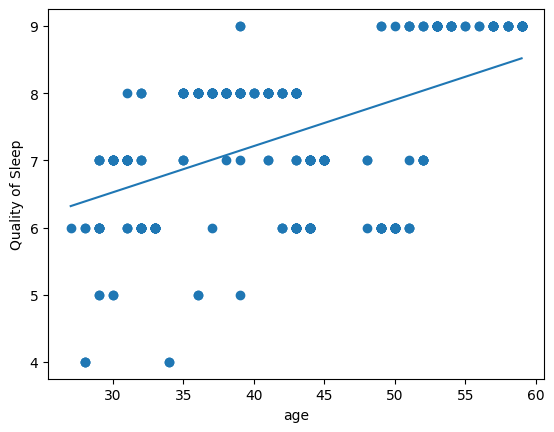

In [26]:
import matplotlib.pyplot as plt #plt for python plotting

age = df['Age']
#sleepDuration = df['Sleep Duration']
sleepQuality = df['Quality of Sleep']

min_age = age.min()
max_age = age.max()
points = 200
step_by = (max_age - min_age)/(points-1)

x_values = [min_age + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

#scatterplot with labels
#gender = howell_full['male']
#plt.scatter(height, weight, c=gender) #scatterplot with gender color coded
plt.scatter(age, sleepQuality)
plt.xlabel('age')
plt.ylabel('Quality of Sleep')

#plt.plot(x_values, y_values, c='red')
plt.plot(x_values, y_values)
plt.show()

In [27]:
reg = LinearRegression()
#make array with desired features
X = train_set[['Sleep Duration']]
y = train_set["Quality of Sleep"]

reg.fit(X,y)

LinearRegression()

In [28]:
# look at internal parameters
print("The bias is ", reg.intercept_)
print("The feature coefficients are ", reg.coef_)

print("The score for the training set is ", reg.score(X,y))

The bias is  -2.33876388559423
The feature coefficients are  [1.35510995]
The score for the training set is  0.7780199508973105


In [32]:
# check test set performance
X = test_set[['Sleep Duration']]
y = test_set["Quality of Sleep"]

print("The score for the test set is ", reg.score(X,y))

The score for the test set is  0.7777886591584886


In [33]:
X = train_set[['Sleep Duration']]
y = train_set["Quality of Sleep"]
X_test = train_set[['Sleep Duration']]
y_test = train_set["Quality of Sleep"]

lr_model = LinearRegression() #create instance of a decision tree model
lr_model.fit(X,y) #train model on training data

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -2.33876388559423
 Coefficients [1.35510995]
 Score 0.7780199508973105
MAE is  0.4317555393439838
RMSE is  0.5684573139193057
MSE is  0.32314371774835204
R^2  0.7780199508973105


C:\Users\laura\Documents\capstone-project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


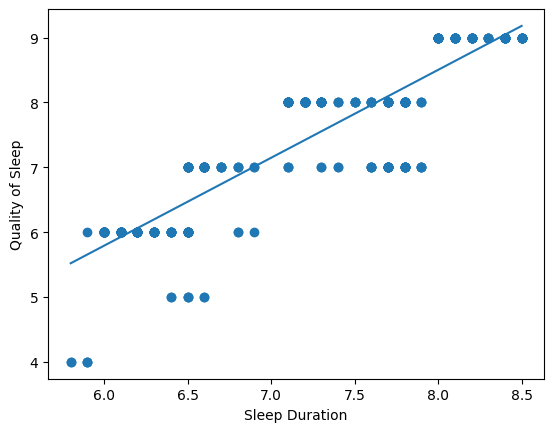

In [35]:

sleepDuration = df['Sleep Duration']
sleepQuality = df['Quality of Sleep']

min_sleepDuration = sleepDuration.min()
max_sleepDuration = sleepDuration.max()
points = 200
step_by = (max_sleepDuration - min_sleepDuration)/(points-1)

x_values = [min_sleepDuration + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

#scatterplot with labels
#gender = howell_full['male']
#plt.scatter(height, weight, c=gender) #scatterplot with gender color coded
plt.scatter(sleepDuration, sleepQuality)
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')

#plt.plot(x_values, y_values, c='red')
plt.plot(x_values, y_values)
plt.show()

In [41]:
#ADD a Feature to the Model
X = train_set[['Age', 'Sleep Duration']]
y = train_set['Quality of Sleep']
X_test = test_set[['Age', 'Sleep Duration']]
y_test = test_set['Quality of Sleep']

lr_model = LinearRegression() #create instance of a decision tree model
lr_model.fit(X,y) #train model on training data

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print('Input: Age, Sleep Duration')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))


# modified copy of the performance reporting code for the training set
y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('Input: Age, SleepDuration')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


Results for linear regression on training data
Input: Age, Sleep Duration
 Default settings
Internal parameters:
 Bias is  -2.6361067028722163
 Coefficients [0.02524737 1.24778066]
 Score 0.8060910483101992
MAE is  0.41686317281749574
RMSE is  0.5313000004529324
MSE is  0.2822796904812859
R^2  0.8060910483101992

Results for linear regression on test data
Input: Age, SleepDuration
MAE is  0.38389874909099525
RMSE is  0.4608166277818132
MSE is  0.21235196444020216
R^2  0.8326121356535683


In [42]:
#Using polynomial regression

from sklearn.preprocessing import PolynomialFeatures
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['Age']]
y = train_set['Quality of Sleep']
X_poly = poly_process.fit_transform(X) #this is the transformed data set for training

X_test = test_set[['Age']]
y_test = test_set['Quality of Sleep']
X_poly_test = poly_process.fit_transform(X_test) #this is the transformed data set for testing

lr_model = LinearRegression() #create instance of a decision tree model
lr_model.fit(X_poly,y) #train model on training data

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))


# modified copy of the performance reporting code for the training set
y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  3
 Default settings
Internal parameters:
 Bias is  -47.509548519997175
 Coefficients [ 3.92797929e+00 -9.27982765e-02  7.22987897e-04]
 Score 0.38646137421069604
MAE is  0.81451249178219
RMSE is  0.9450653527004078
MSE is  0.8931485208747462
R^2  0.38646137421069604

Results for linear regression on test data
MAE is  0.8169748080048415
RMSE is  0.921502415830222
MSE is  0.8491667023809354
R^2  0.33063863496457935


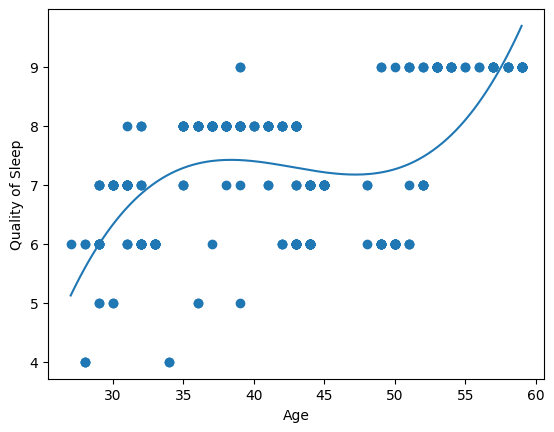

In [43]:
#Polynomial Resource Graph

import matplotlib.pyplot as plt #plt for python plotting
age = df['Age'] #get values for height
sleepQuality = df['Quality of Sleep'] #get values for weight

min_age = age.min()
max_age = age.max()
points = 200
step_by = (max_age - min_age)/(points-1)

x_values = [min_age + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)

#scatterplot with labels
#gender = howell_full['male']
plt.scatter(age, sleepQuality)#, c=gender) #scatterplot with gender color coded
plt.xlabel('Age')
plt.ylabel('Quality of Sleep')

plt.plot(x_values, y_values)#, c='red')
plt.show()

In [44]:
#Using polynomial regression

from sklearn.preprocessing import PolynomialFeatures
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['Sleep Duration']]
y = train_set['Quality of Sleep']
X_poly = poly_process.fit_transform(X) #this is the transformed data set for training

X_test = test_set[['Sleep Duration']]
y_test = test_set['Quality of Sleep']
X_poly_test = poly_process.fit_transform(X_test) #this is the transformed data set for testing

lr_model = LinearRegression() #create instance of a decision tree model
lr_model.fit(X_poly,y) #train model on training data

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))


# modified copy of the performance reporting code for the training set
y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  3
 Default settings
Internal parameters:
 Bias is  -122.87495230349892
 Coefficients [51.09677388 -6.78620182  0.30625432]
 Score 0.7920746520418391
MAE is  0.42815846744162667
RMSE is  0.5501670866888128
MSE is  0.3026838232756556
R^2  0.7920746520418391

Results for linear regression on test data
MAE is  0.43643866227734274
RMSE is  0.540444394770933
MSE is  0.29208014383932
R^2  0.7697658619540113


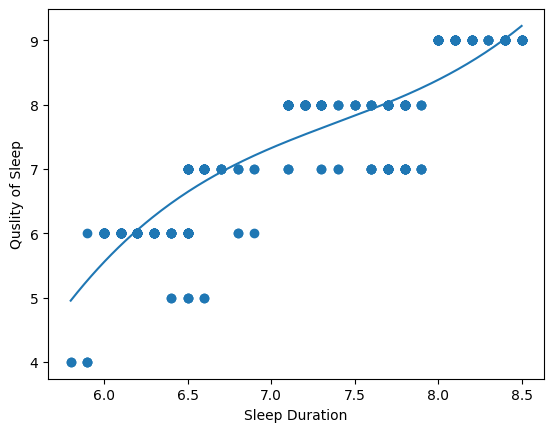

In [45]:
#Polynomial Resource Graph

import matplotlib.pyplot as plt #plt for python plotting
sleepDuration = df['Sleep Duration'] #get values for height
sleepQuality = df['Quality of Sleep'] #get values for weight

min_sleepDuration = sleepDuration.min()
max_sleepDuration = sleepDuration.max()
points = 200
step_by = (max_sleepDuration - min_sleepDuration)/(points-1)

x_values = [min_sleepDuration + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)

#scatterplot with labels
#gender = howell_full['male']
plt.scatter(sleepDuration, sleepQuality)#, c=gender) #scatterplot with gender color coded
plt.xlabel('Sleep Duration')
plt.ylabel('Quslity of Sleep')

plt.plot(x_values, y_values)#, c='red')
plt.show()